#  1.  How generalizable is a trained agent?

If we train onne version of an enviroment like e.g., a gridworld setup, how well does our trained agent fair on another version of the same enviroment like e.g., another grdiworld setup?

# 4.  Short term / long term trad-off parameter

Often in practice one includes a parameter $\gamma \in [0,1]$ to regularize or dampen later rewards and prevent the effect of later actions to interfere with maximal actions in the present state.  Adding this parameter we have an adjusted recursive definition of $Q$ as

$Q\left(s_{k-1},\,a_{k}\right)=r_{k}+\gamma\cdot\underset{i=1...M}{\text{maximum}}\,\,Q\left(s_{k},\,\alpha_{i}\right)$

By scaling $\gamma$ up and down we can tune the influence short-term versus long-term rewards have on how $Q$ is learned.  For example:

- When we set $\gamma = 0$ then only the first reward $r_1$ remains. Our agent learns to take a 'greedy' approach to accomplishing our goal, at each state taking the next step that maximizes the next step reward only.


- When we set $\gamma = 1$ then we have our original cost function. 

In [ ]:
# add backend python files to path
import sys
sys.path.append('demo_python_backend_files')
import matplotlib.pyplot as plt

# this line lets us plot in the notebook inline
%matplotlib inline

# import custom gridworld simulator 
from my_gridworld import gridworld


# generate instance of gridworld
small_maze = gridworld(world_size = 'small', world_type = 'random',training_episodes = 20,validation_episodes = 100)

gammas = [0,0.5,1]
rewards = []
for i in range(len(gammas)):
    gamma = gammas[i]
    small_maze.qlearn_v1(gamma = gamma,validate = True)
    rewards.append(small_maze.validation_reward_v1)
    
for i in range(len(gammas)):
    plt.plot(rewards[i][2:])
plt.xlabel('episode')
plt.ylabel('average reward')
plt.title('validation history')
plt.legend(['gamma = ' + str(gammas[0]),'gamma = ' + str(gammas[1]),'gamma = ' + str(gammas[2])],loc='center left', bbox_to_anchor=(1, 0.5))

# 4.  Eexploration / exploitation tradeoff: a fundamental improvement to Q-Learning 

One glaring ineffeciency in the basic Q-Learning algorithm cries out for improvement: how actions are chosen during each step of a training episode.  Remember that in the most basic version of Q-Learning actions are taken *randomly* while training, and then according to the optimal policy when validating.  Because each training episode ends only when a goal state is reached - or a maximum number of steps is taken - choosing actions randomly while training results in hugely ineffecient training.

On the other hand, remember also that the tacit assumption while validating is that the Q function has been properly trained and because of this we can use the recursive definition of the Q function - the optimal policy function - to make an optimal choice of action at each step of validation.    




The basic Q learning algorithm employs random actions to learn the structure of the Q function.  This is approach is very costly in terms of training effeciently.  

Remember the entire goal of Q learning is to - using its recursive definition - iteratively construct the Q function.  

In [36]:
# activate this cell to see the Q learning algorithm used for gridworld above
small_maze = gridworld(world_size = 'small', world_type = 'maze',training_episodes = 200,validation_episodes = 50)  
small_maze.qlearn_v1(validate = True)
small_maze.qlearn_v2(validate = True)

training episode 50 of 200 complete
training episode 100 of 200 complete
training episode 150 of 200 complete
training episode 200 of 200 complete
q-learning version 1 algorithm complete
training episode 50 of 200 complete
training episode 100 of 200 complete
training episode 150 of 200 complete
training episode 200 of 200 complete
q-learning version 2 algorithm complete


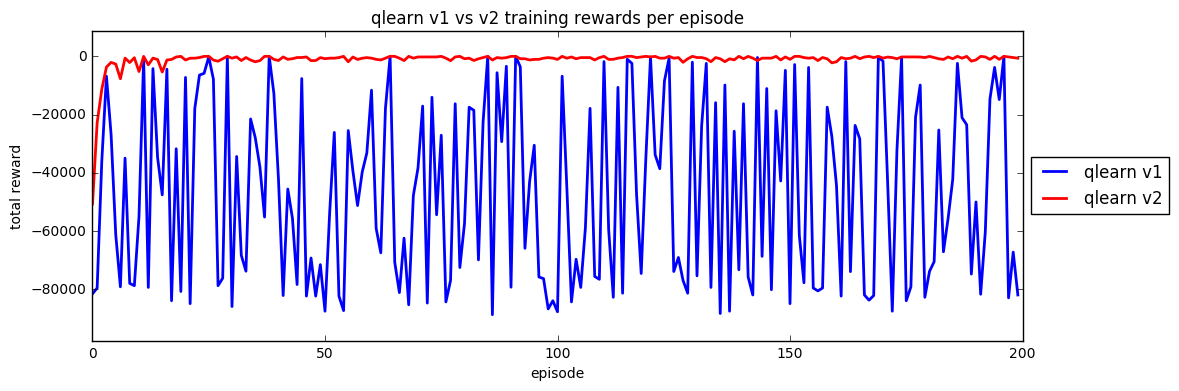

In [37]:
small_maze.compare_v1v2_training_rewards()

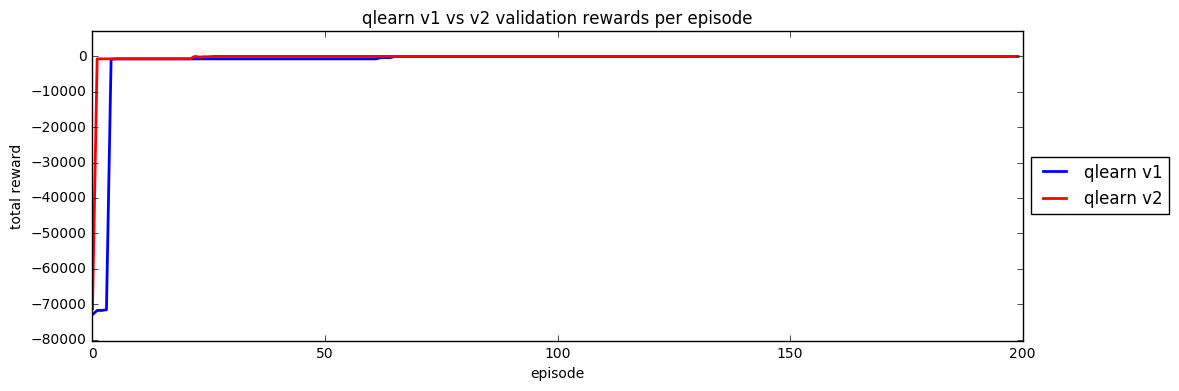

In [38]:
small_maze.compare_v1v2_validation_rewards()

In [1]:
# add backend python files to path
import sys
sys.path.append('demo_python_backend_files')

# this line lets us plot in the notebook inline
%matplotlib inline

# import custom gridworld simulator 
from my_gridworld import gridworld

# generate instance of gridworld
small_maze = gridworld(world_size = 'small', world_type = 'random',training_episodes = 500)

small_maze.qlearn_v1()


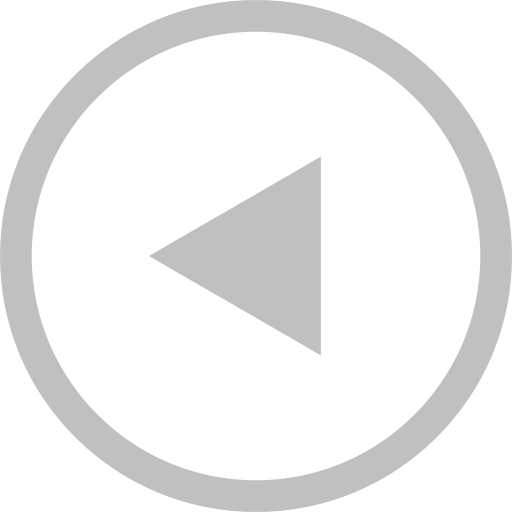
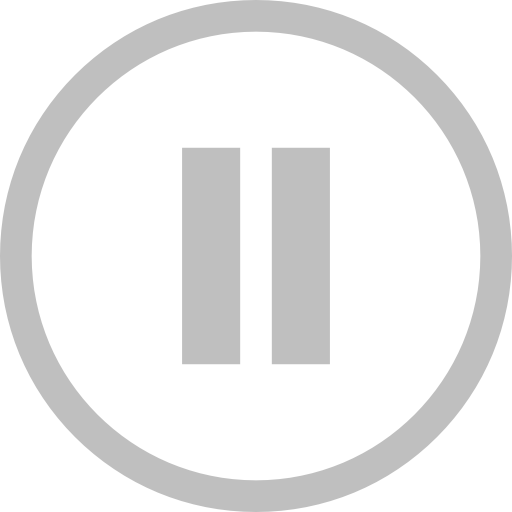
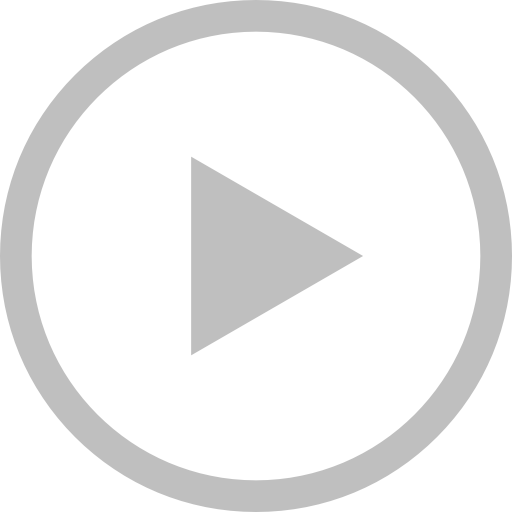
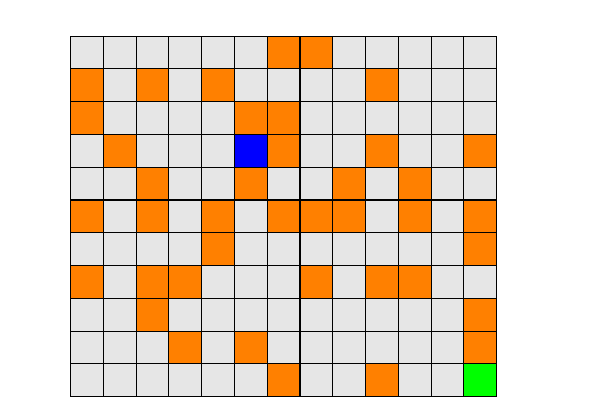
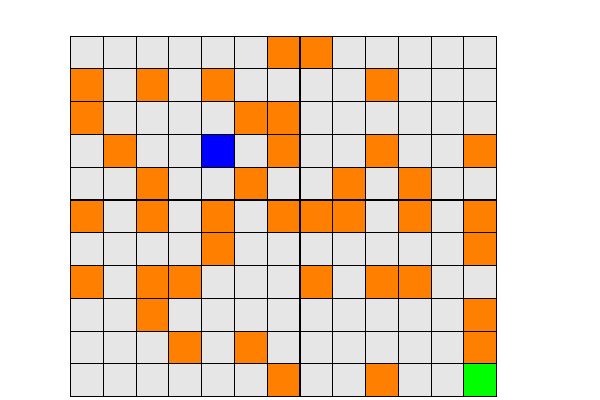
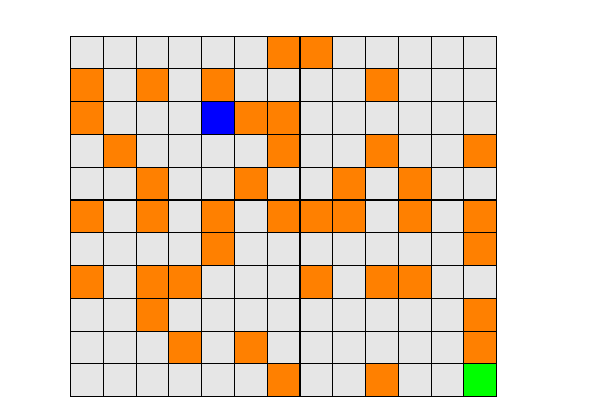
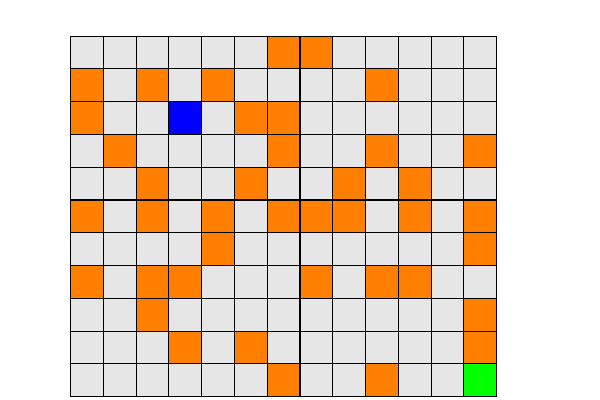
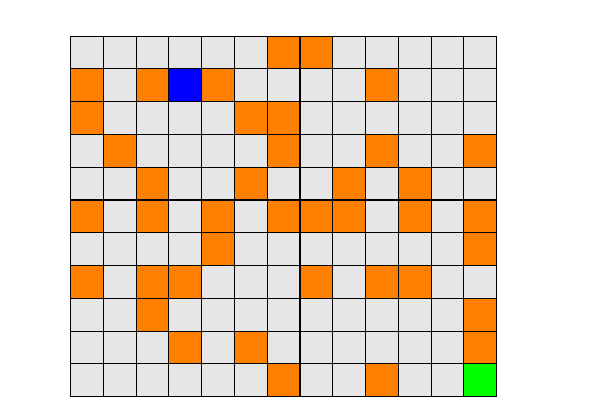
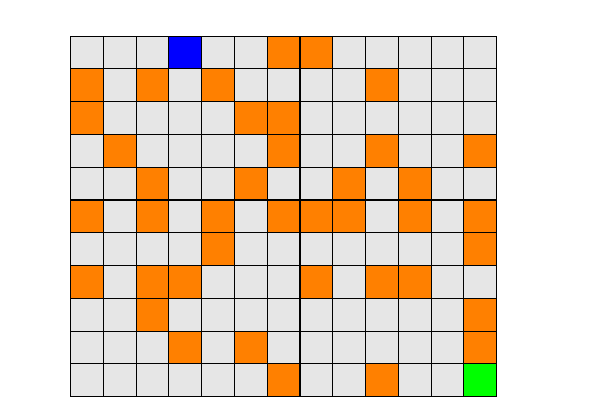
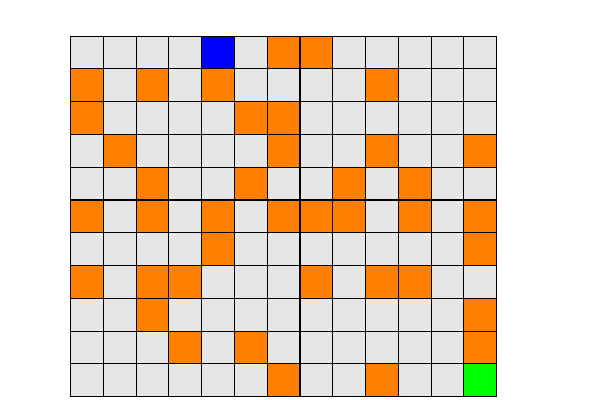
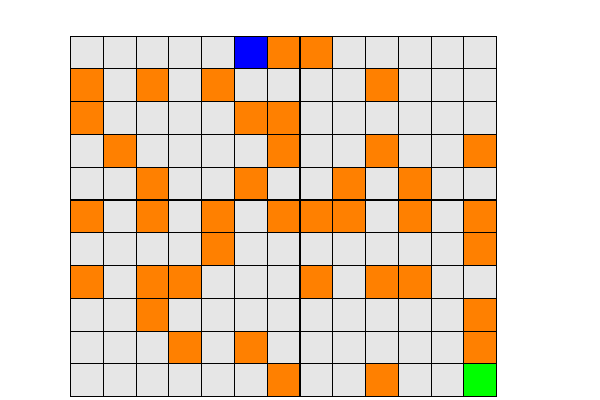
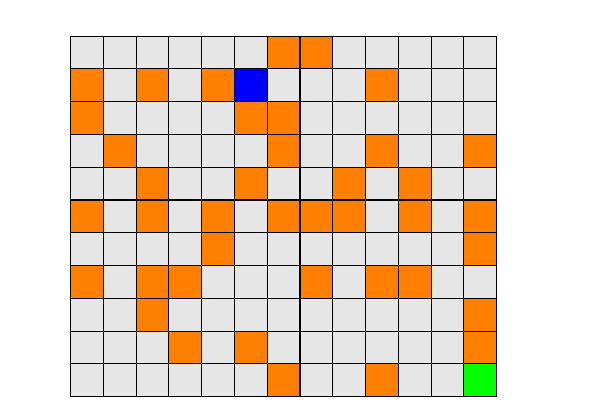
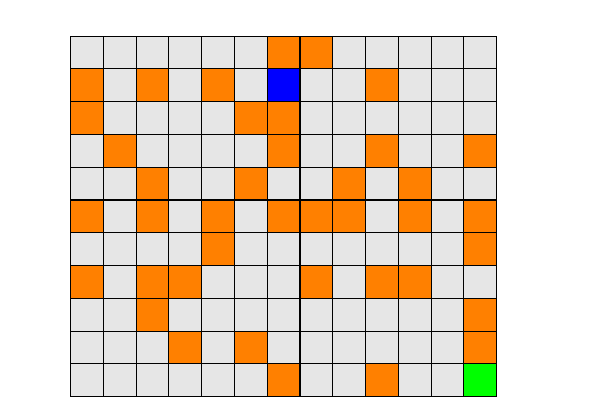
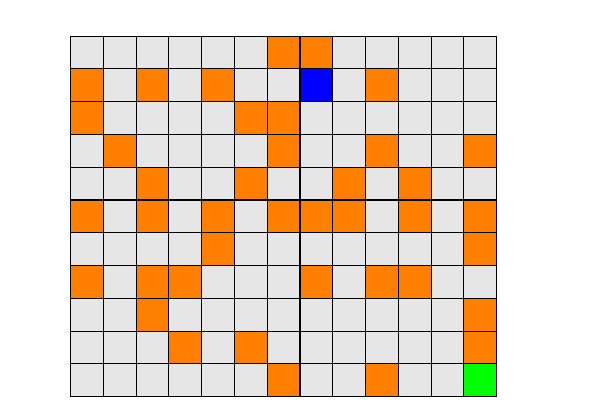
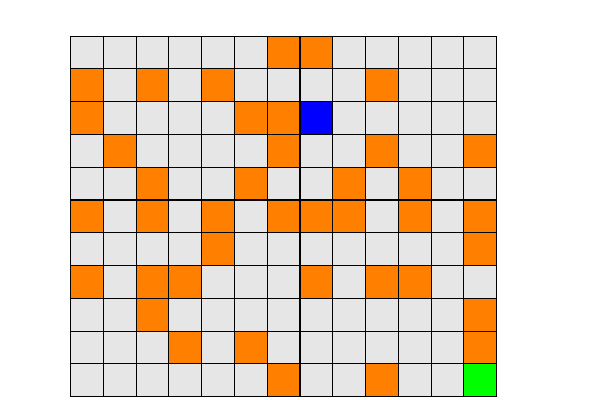
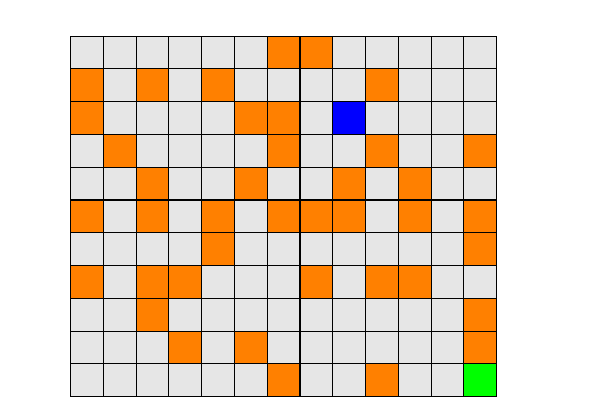
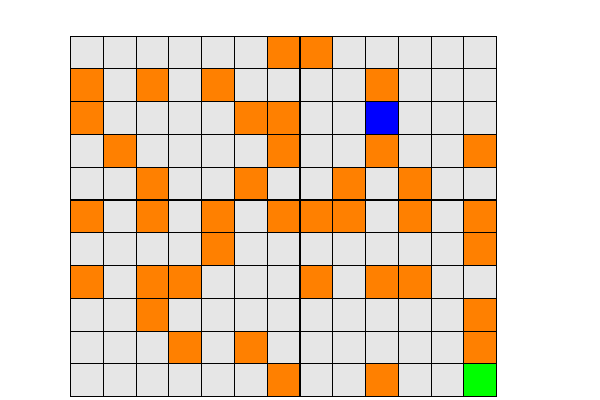
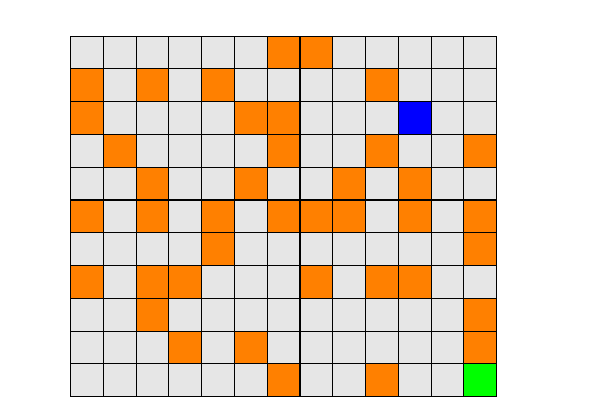
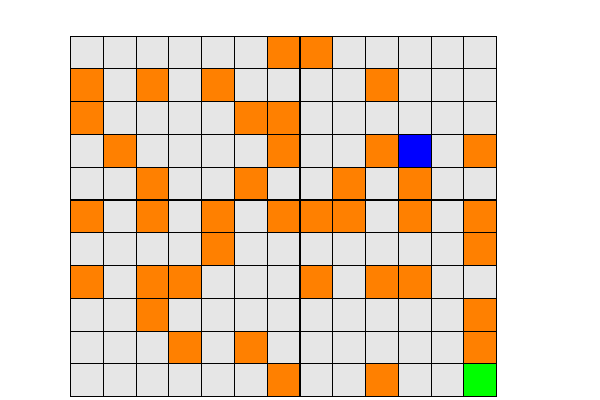
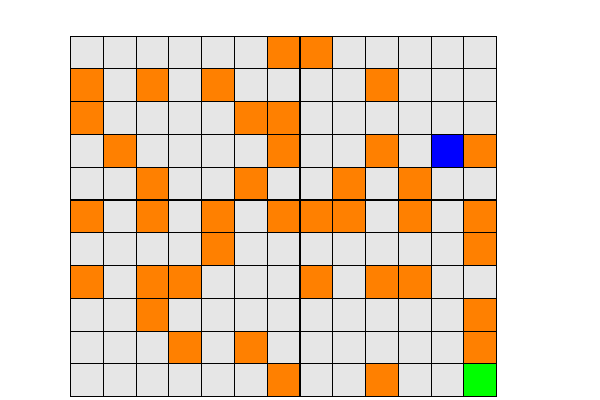
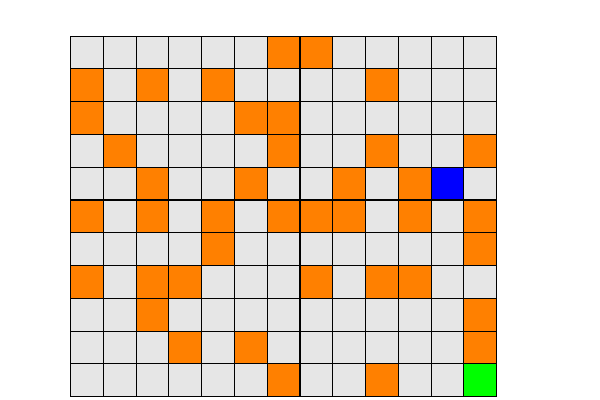
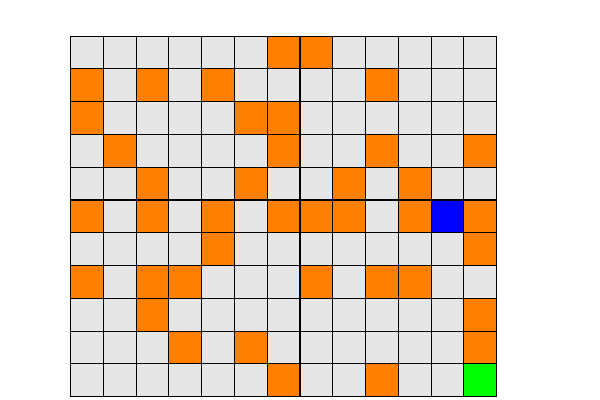
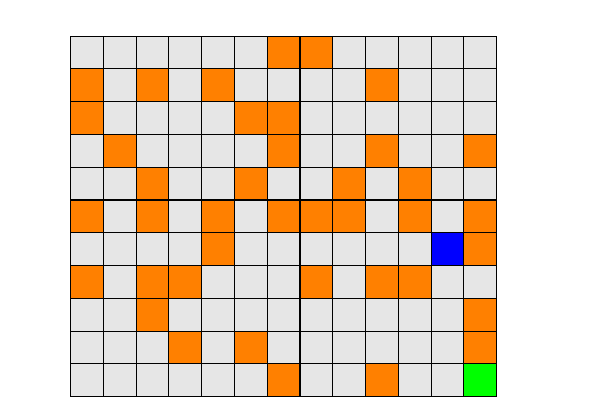
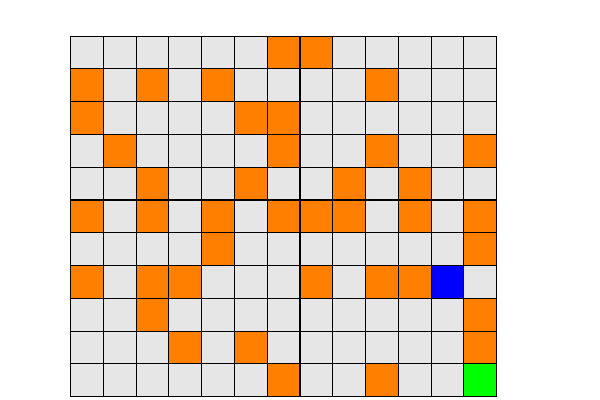
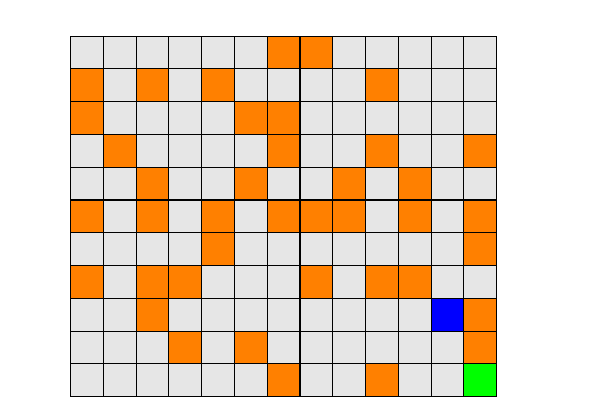
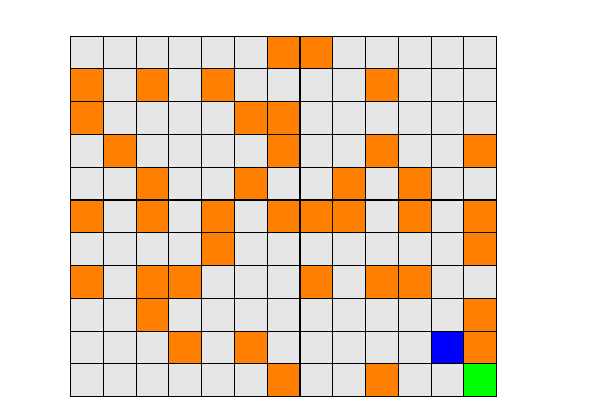
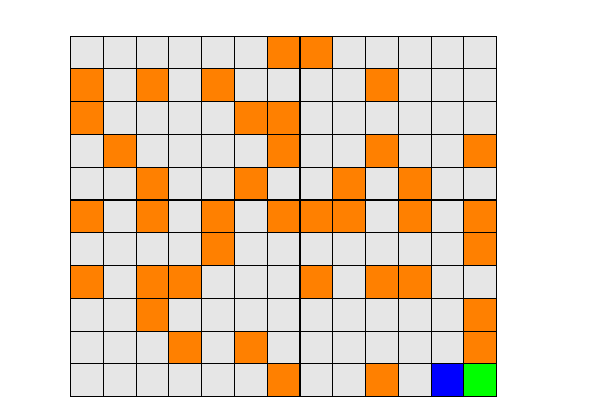
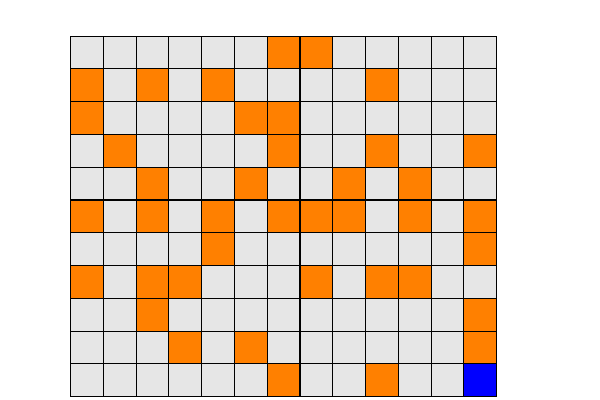

In [3]:
small_maze.animate_trained_run(loc = [7,5],algorithm = 2)

<a id='bib_cell'></a>

## Notes and bibliography

[0] Harmon, Mance E., and Stephanie S. Harmon. Reinforcement Learning: A Tutorial. No. WL-TR-97-1028. WRIGHT LAB WRIGHT-PATTERSON AFB OH, 1997

[1]  There are many algorithms specifically designed to solve just this task - the most popular being [Dijkstra’s and A\* algorithms](http://www.redblobgames.com/pathfinding/a-star/introduction.html).  However the more flexible RL framework too provides great results.

[2] Lai, Matthew. "Giraffe: Using deep reinforcement learning to play chess." arXiv preprint arXiv:1509.01549 (2015).
APA	

[3]  Mnih, Volodymyr, et al. "Playing atari with deep reinforcement learning." arXiv preprint arXiv:1312.5602 (2013).
    
[4]  Image taken from http://ai.berkeley.edu/project_overview.html

[5] Watkins, Christopher JCH, and Peter Dayan. "Q-learning." Machine learning 8.3-4 (1992): 279-292.

[6]  Image taken from https://gym.openai.com/